In [1]:
%matplotlib inline

# A role for activation-triggered hyperexcitability in short-term sequence replay in neural networks

### Rich Pang and Adrienne Fairhall

## Abstract

The reactivation of neuronal activity patterns outside the context in which they originally occurred is thought to play an important role in mediating memory, but the biophysical mechanisms underlying reactivation are not well understood. Especially mysterious is the short-term replay of sequential activity patterns occurring in the recent past, since spike-timing-dependent plasticity, the biophysical mechanism normally invoked to bias model networks towards sequence production, is not thought to have a substantial effect on such short time-scales. Here we propose a model in which short-term memory for sequences is maintained in persistent activity triggered by the original sequence activation, and which directly increases the effective excitability of the neural ensembles involved in the sequence, thus leading to an increased probability of replay of sequences involving those ensembles. We show how such a phenomenon can be implemented in a simple dynamical model, and we show that the number of sequences that a randomly connected recurrent network can replay grows polynomially in the number of ensembles in the network (with degree equal to sequence length). In a simplified probabilistic model we then show how the decodability of past stimulus sequences from future neural replay sequences (in the absence of the stimulus) increases as the network connectivity becomes reflective of the stimulus transitions. Finally, we discuss the computational principals underlying our model in terms of attractors and the generation of spatiotemporal patterns from spatially defined information. Our model provides a low-complexity, biologically plausible alternative to other sequence reactivation models and makes the prediction that reactivation of arbitrary sequences in biological neural networks will be much less common than reactivation of sequences already preferentially embedded in the network.

## Introduction

The replay of neuronal activity patterns outside of the behavioral context in which they originally occurred is thought to play an important role in the retention and recall of memories (Gelbard-Sagiv 2008, Dupret 2010, Carr 2011). However, while neuronal pattern replay has been observed across a diverse set of brain areas, including mammalian hippocampus (Skaggs 1996, Nadasdy 1999, Louie 2001, Davison 2009), ventral striatum (Wimmer 2016), ventral tegmental area (Valdes 2015), prefrontal cortex (Euston 2007), and visual cortex (Ji 2007, Han 2008, Eagleman 2012), as well as in RA in songbirds (Dave 2000), the biophysical mechanisms underlying this phenomenon are poorly understood. This is because in order for replay to occur a neural activity pattern must be temporarily "tagged" upon its initial activation such that its probability of activating again at a later time is preferentially increased, but how such tagging might occur is not clear. This appears especially problematic in the replay of spatiotemporal patterns or sequences, in which not only specific sets of neurons, but directed associations between them, must be remembered and reproduced. Worthy of even further consideration is the observed replay of sequential activity patterns nearly immediately after their original activation (Han 2008, Davison 2009, Eagleman 2012), since canonical sequence-reinforcing plasticity mechanisms, such as spike-timing-dependent plasticity (STDP) (Bi 2001), are generally quite weak (Markram 1997, Bi 2001) and would not be expected to significantly alter neural network dynamics over short time courses. Indeed, network models using STDP as their primary learning rule typically require a large number of stimulus presentations (i.e., at least dozens) before the network can generate stereotyped sequences (Fiete 2010, Klampfl 2013, Huang 2015). (Some effort has been made to identify precise regimes under which STDP may have faster effects [Yger 2015], but in this case STDP did not specifically bias the generation of sequences.)

The alternative to mediation of short-term sequential replay by synaptic plasticity is mediation by temporary changes in network state. That is, one might imagine a portion of the network collapsing onto an *attractor* that maintains a representation from which the original sequence can later be reconstructed. Indeed, such attractor networks are perhaps the most common model for short-term memory in neural systems (Barak 2014, Chaudhuri 2016). While attractors can in general have relatively arbitrary time-varying structure yet which still contains information about previous activity patterns (Maass 2002), for the purpose of parsimony we focus on a specific subset of attractor models that have the following property: activation of an ensemble of neurons moves a portion of the network to an attractor state such that the excitability of the activated ensemble is increased while the network remains in that attractor state. We later show that neural ensembles with this property can easily be built using a standard "rate-based" model network (Wilson 1972) with loosely tuned connectivity, and that the attractors that emerge from sets of these ensembles are of a compositional nature, which greatly increases the set of possible stable states that can be temporarily maintained.

In addition to parsimony this choice of model class is motivated by a growing body of experimental work suggesting that neurons in many brain regions can indeed show short-term, activation-triggered increases in excitability. Specifically, it has been shown during a variety of working memory tasks that certain neurons exhibit an increased response to the second presentation of a stimulus relative to the first (reviewed in Tartaglia 2015). For example, many stimulus-selective neurons in primate inferotemporal cortex (IT) responded more strongly to a stimulus when the stimulus matched a target that had been shown a few seconds earlier, relative to when a different target had been shown (Miller 1994), with similar results later obtained in MT (Liu 2011) and V4 (Hayden 2013). A more recent experiment in which functional magnetic resonance imaging (fMRI) recordings were made on human volunteers that were shown sequences of faces found that many face-responsive voxels, which are a proxy for large populations of neurons (Huettel 2004), demonstrated a consistent enhancement of their responses to repeated faces (de Gardelle 2012). 

Here we explore the capacity for an attractor network whose connectivity produces activation-triggered lingering hyperexcitability to demonstrate preferential replay of recent, stimulus-driven activity sequences. We first demonstrate sequential replay in a rate-based network model with a simple tree-like connectivity structure. Next we perform a graph theoretical analysis of the capacity for randomly connected recurrent networks to exhibit short-term sequential replay and show that for a fixed sequence length $L$, on average $\sim O(N^L)$ sequences can be replayed in a network of $N$ ensembles. Using a simplified dynamical model we then show that the decodability of past stimulus sequences from future neural replay sequences increases when the internal network connectivity is reflective of the transition probabilities among stimulus elements. Finally, we discuss how our results suggest the utility and biological feasibility of large sets of stable, compositionally constructed attractor states and how the spatial information maintained in these attractors combined with the connectivity structure of the neural network can yield a rich space of replayable sequential activity patterns.

## Results

### Activation-triggered hyperexcitability in a network of leaky integrate-and-fire neurons yields stimulus-specific sequence replay

We first provide a proof-of-principle demonstration of how a network of leaky integrate-and-fire (LIF) neurons can yield sequence replay. The network consists of three neuron types: primary neurons, memory neurons, and inhibitory neurons, with sequence activation corresponding to sequential spiking activity in primary neurons. All neurons have identical membrane time constants, resting potentials, threshold potentials, reset potentials, and refractory periods. All input to a neuron, either external or from other neurons in the network, arises through synaptic activation, which leads to transient conductance changes and deflections of the neuron's membrane potential. Primary and memory neurons send only excitatory (glutamatergic) projections to other neurons, with the inhibitory neuron sending only inhibitory (GABAergic) projections. The network consists of 9 primary neurons $(P1 - P12)$, 9 memory neurons $(M1 - M12)$, and 1 inhibitory neuron $(I1)$.

The ability of the network to replay sequences arises as a consequence of its synaptic connectivity (**Figure 1A**). Each primary neuron projects to and receives a projection from the inhibitory neuron, which also sends an inhibitory connection to itself. Each primary neuron also sends an excitatory projection to and receives an excitatory projection from one corresponding memory neuron, and each memory neuron sends an excitatory projection to itself. The memory neuron self-connection is strong enough to endow the neuron with bistability between a non-spiking downstate and a persistently spiking upstate. The connections among the primary neurons in each ensemble are arranged in a tree-like structure with a branch point at neuron $P3$.

**Figure 1B** shows an example of sequence replay in the LIF network just described. A sequence of primary neurons $[P1, P2, P3, P4, P5, P6]$ is first activated by sequentially driving each neuron with an external excitatory input for X seconds, superimposed upon a global background of noisy inhibitory inputs to the primary neurons. After the initial sequence, a global background of noisy excitatory inputs is added to the inhibitory background. Subsequently, a "trigger" excitatory input is applied to the first primary neuron in the sequence, causing it to spike and the rest of the neurons in the sequence to follow. At $t = ...$ a short pulse of GABAergic inputs is applied to the memory neurons, reseting the network to its original state. After reseting, a different sequence $[P1, P2, P3, P7, P8, P9]$ is activated by an external stimulus and subsequently replayed in response to the same excitatory trigger to primary neuron $P1$. Sequence replay, however, can also arise without a trigger, as exemplified by the spontaneous sequence activation at time $t = ...$. Importantly, each of the two sequences begins with the same subsequence $[P1, P2, P3]$, so the identity of the replayed sequence is determined not just by its first elements, but indeed by activation of the latter elements in the recent past. Thus, the network can maintain information about a stimulus-elicited activation sequence in a transient attractor state, i.e., persistent activation of a subset of memory neurons (**Figure 1C**), such that the specific sequence being maintained is replayed upon activation of the first neuron in the sequence. Notably, the timescale of the sequence being replayed is determined by the intrinsic network dynamics, not by the stimulus. Since in this case the stimulus timescale is slower than the network timescale, the replay is compressed, as is seen frequently in the brain (Davidson 2009).

**Figure 1D** shows the voltage traces of primary neuron $P4$, memory neuron $M4$ and the inhibitory neuron $I1$ during the initial stimulus-driven activation of the sequence $[P1, P2, P3, P4, P5, P6]$: $M4$ is moved to its upstate by the multi-spike activity of $P4$. **Figure 1E** shows the voltage traces of primary neurons $P3$, $P4$, and $P7$, memory neurons $M4$ and $M7$, and the inhibitory neuron $I1$ during reactivation of the original stimulus-driven sequence $[P1, P2, P3, P4, P5, P6]$. Since $M4$ but not $M7$ has been moved to its upstate by the original activation sequence, P4 receives increased persistent excitatory input. Thus, even though both $P4$ and $P7$ receive the same excitatory input from $P3$ following $P3$'s spike, only $P4$ is able to cross its threshold due to the additional excitatory input it receives from $M4$.

<img src="files/images/final_paper_LIF_connectivity.png" />

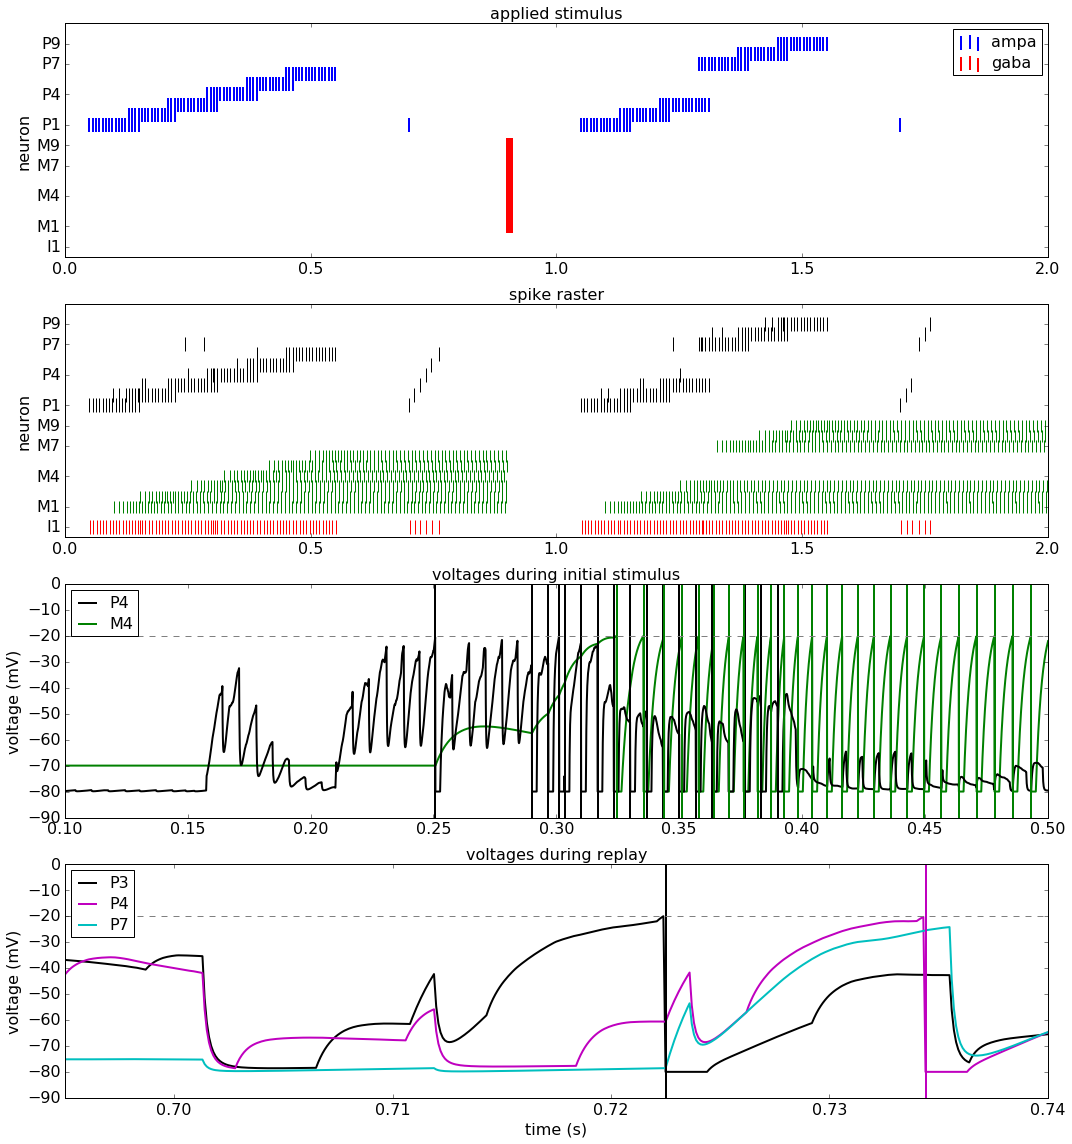

In [12]:
%matplotlib inline
from figures.final_paper import lif_demo_two_branches

fig_1 = lif_demo_two_branches(
    SEED=0,
    
    V_REST=-0.07, TAU_M=0.055, V_TH=-0.02, V_RESET=-0.08, REFRAC_PER=0.002,
    
    TAUS_SYN={'nmda': 0.01, 'ampa': 0.001, 'gaba': 0.001},
    V_REVS_SYN={'nmda': 0.0, 'ampa': 0.0, 'gaba': -0.08},
    
    BRANCH_LEN=3,
    
    W_PP={'nmda': 20, 'ampa': 0, 'gaba': 0},
    W_PI={'nmda': 0, 'ampa': 0, 'gaba': 200},
    W_PM={'nmda': 0, 'ampa': 15, 'gaba': 0},
    W_IP={'nmda': 0, 'ampa': 100, 'gaba': 0},
    W_II={'nmda': 0, 'ampa': 0, 'gaba': 10},
    W_MP={'nmda': 2, 'ampa': 0, 'gaba': 0},
    W_MM={'nmda': 12, 'ampa': 0, 'gaba': 0},
    
    BKGD_STARTS=[
        {'nmda': 0, 'ampa': 0, 'gaba': 0},  # CONSTANT
        {'nmda': 0, 'ampa': 0, 'gaba': 0},  # DRIVE 1
        {'nmda': 0, 'ampa': 1, 'gaba': 1},  # DRIVE 2
    ],
    BKGD_ENDS=[
        {'nmda': 0, 'ampa': 0, 'gaba': 2.},  # CONSTANT
        {'nmda': 0, 'ampa': 0, 'gaba': 0.6},  # DRIVE 1
        {'nmda': 0, 'ampa': 1, 'gaba': 1.6},  # DRIVE 2
    ],
    BKGD_FRQS=[
        {'nmda': 0, 'ampa': 0, 'gaba': 2000},  # CONSTANT
        {'nmda': 0, 'ampa': 0, 'gaba': 2000},  # DRIVE 1
        {'nmda': 0, 'ampa': 0, 'gaba': 2000},  # DRIVE 2
    ],
    BKGD_STRENS=[
        {'nmda': 0, 'ampa': 0, 'gaba': .5},  # CONSTANT
        {'nmda': 0, 'ampa': 0, 'gaba': 5},  # DRIVE 1
        {'nmda': 0, 'ampa': 0, 'gaba': 5},  # DRIVE 2
    ],
    
    DRIVE_ORDERS=[
        [0, 1, 2, 3, 4, 5], [0, 1, 2, 6, 7, 8]
    ],
    DRIVE_STARTS=[
        {'nmda': 0, 'ampa': 0.05, 'gaba': 0}, {'nmda': 0, 'ampa': 1.05, 'gaba': 0},
    ],
    DRIVE_STRENS=[
        {'nmda': 0, 'ampa': 500, 'gaba': 0}, {'nmda': 0, 'ampa': 500, 'gaba': 0},
    ],
    DRIVE_DURS=[
        {'nmda': 0, 'ampa': 0.1, 'gaba': 0}, {'nmda': 0, 'ampa': 0.1, 'gaba': 0}
    ],
    DRIVE_FRQS=[
        {'nmda': 0, 'ampa': 150, 'gaba': 0}, {'nmda': 0, 'ampa': 150, 'gaba': 0}
    ],
    DRIVE_ITVS=[
        {'nmda': 0, 'ampa': 0.08, 'gaba': 0}, {'nmda': 0, 'ampa': 0.08, 'gaba': 0}
    ],
    
    REPLAY_TRIGGER_TIMES=[
        {'nmda': 0, 'ampa': 0.7, 'gaba': 0}, {'nmda': 0, 'ampa': 1.7, 'gaba': 0}
    ],
    REPLAY_TRIGGER_STRENS=[
        {'nmda': 0, 'ampa': 200, 'gaba': 0}, {'nmda': 0, 'ampa': 200, 'gaba': 0}
    ],
    
    MEMORY_RESET_STARTS=[{'nmda': 0, 'ampa': 0, 'gaba': 0.9}],
    MEMORY_RESET_ENDS=[{'nmda': 0, 'ampa': 0, 'gaba': .91}],
    MEMORY_RESET_STRENS=[{'nmda': 0, 'ampa': 0, 'gaba': 10}],
    MEMORY_RESET_FRQS=[{'nmda': 0, 'ampa': 0, 'gaba': 500}],
    
    SIM_DURATION=2., DT=0.0001,
    
    P_4_M_4_PLOT_LIMITS=(0.1, 0.5),
    P_3_P_4_P_7_PLOT_LIMITS=(0.695, 0.74),
    
    FIG_SIZE=(15, 16),
    SYN_COLORS={'ampa': 'b', 'gaba': 'r'},
    FONT_SIZE=16,
)

# run 1 simulation, with seed set so that we see spontaneous replay within a reasonable time window
# 1A: connectivity diagram
# 1B: primary neuron raster plot for 2 replayed sequences, with spontaneous replay arising afterwards
# 1C: memory neuron raster
# 1D: voltages of P4, M4 and I1 during initial sequence activation
# 1E: voltages of P4, P7, M4, M7, and I1 during reactivation

We next show how the behavior of the network can be modulated by global "control" inputs. For instance, an inhibitory input applied homogeneously to all memory units prevents them from switching to their upstates following initial sequence activation, thus preventing subsequent sequence replay (**Figure 2A**). The network can also be moved to a spontaneously active state by applying global noisy excitatory background input, in which case both allowable sequences activate spontaneously (**Figure 2B**).

In [1]:
from figures.final_paper import lif_demo_two_branches_global_controls

# 2A: global inhibition to memory units

fig_2 = lif_demo_two_branches_global_controls(
    SEED=0,
    
    V_REST=-0.07, TAU_M=0.055, V_TH=-0.02, V_RESET=-0.08, REFRAC_PER=0.002,
    
    TAUS_SYN={'nmda': 0.01, 'ampa': 0.001, 'gaba': 0.001},
    V_REVS_SYN={'nmda': 0.0, 'ampa': 0.0, 'gaba': -0.08},
    
    BRANCH_LEN=3,
    
    W_PP={'nmda': 20, 'ampa': 0, 'gaba': 0},
    W_PI={'nmda': 0, 'ampa': 0, 'gaba': 200},
    W_PM={'nmda': 0, 'ampa': 20, 'gaba': 0},
    W_IP={'nmda': 0, 'ampa': 100, 'gaba': 0},
    W_II={'nmda': 0, 'ampa': 0, 'gaba': 10},
    W_MP={'nmda': 2, 'ampa': 0, 'gaba': 0},
    W_MM={'nmda': 12, 'ampa': 0, 'gaba': 0},
    
    BKGD_STARTS=[
        {'nmda': 0, 'ampa': 0, 'gaba': 0}, {'nmda': 0, 'ampa': 0.6, 'gaba': 0.6},
        {'nmda': 1, 'ampa': 1, 'gaba': 1}, {'nmda': 1, 'ampa': 1.6, 'gaba': 1.6},
    ],
    BKGD_ENDS=[
        {'nmda': 0, 'ampa': 0, 'gaba': 0.6}, {'nmda': 0, 'ampa': 0.9, 'gaba': 0.9},
        {'nmda': 1, 'ampa': 1, 'gaba': 1.6}, {'nmda': 1, 'ampa': 1.9, 'gaba': 1.9},
    ],
    BKGD_FRQS=[
        {'nmda': 0, 'ampa': 0, 'gaba': 2000}, {'nmda': 0, 'ampa': 2000, 'gaba': 2000},
        {'nmda': 0, 'ampa': 0, 'gaba': 2000}, {'nmda': 0, 'ampa': 2000, 'gaba': 2000},
    ],
    BKGD_STRENS=[
        {'nmda': 0, 'ampa': 0, 'gaba': 5}, {'nmda': 0, 'ampa': .5, 'gaba': .5},
        {'nmda': 0, 'ampa': 0, 'gaba': 5}, {'nmda': 0, 'ampa': .5, 'gaba': .5},
    ],
    
    DRIVE_ORDERS=[
        [0, 1, 2, 3, 4, 5], [0, 1, 2, 6, 7, 8]
    ],
    DRIVE_STARTS=[
        {'nmda': 0, 'ampa': 0.05, 'gaba': 0.01}, {'nmda': 1, 'ampa': 1.05, 'gaba': 1.01},
    ],
    DRIVE_STRENS=[
        {'nmda': 0, 'ampa': 500, 'gaba': 0}, {'nmda': 0, 'ampa': 500, 'gaba': 0},
    ],
    DRIVE_DURS=[
        {'nmda': 0, 'ampa': 0.1, 'gaba': 0}, {'nmda': 0, 'ampa': 0.1, 'gaba': 0}
    ],
    DRIVE_FRQS=[
        {'nmda': 0, 'ampa': 150, 'gaba': 0}, {'nmda': 0, 'ampa': 150, 'gaba': 0}
    ],
    DRIVE_ITVS=[
        {'nmda': 0, 'ampa': 0.08, 'gaba': 0}, {'nmda': 0, 'ampa': 0.08, 'gaba': 0}
    ],
    
    REPLAY_TRIGGER_TIMES=[
        {'nmda': .7, 'ampa': 0, 'gaba': 0}, {'nmda': 1.7, 'ampa': 1, 'gaba': 1}
    ],
    REPLAY_TRIGGER_STRENS=[
        {'nmda': 20, 'ampa': 0, 'gaba': 0}, {'nmda': 20, 'ampa': 0, 'gaba': 0}
    ],
    
    MEMORY_INH_STARTS=[{'nmda': 0, 'ampa': 0, 'gaba': 0}],
    MEMORY_INH_ENDS=[{'nmda': 0, 'ampa': 0, 'gaba': 1.9}],
    MEMORY_INH_STRENS=[{'nmda': 0, 'ampa': 0, 'gaba': 60}],
    MEMORY_INH_FRQS=[{'nmda': 0, 'ampa': 0, 'gaba': 50}],
    
    SIM_DURATION=2., DT=0.0001,
    
    FIG_SIZE=(13, 6), FONT_SIZE=16,
)

# 2B: global excitation

fig_2 = lif_demo_two_branches_global_controls(
    SEED=0,
    
    V_REST=-0.07, TAU_M=0.055, V_TH=-0.02, V_RESET=-0.08, REFRAC_PER=0.002,
    
    TAUS_SYN={'nmda': 0.01, 'ampa': 0.001, 'gaba': 0.001},
    V_REVS_SYN={'nmda': 0.0, 'ampa': 0.0, 'gaba': -0.08},
    
    BRANCH_LEN=3,
    
    W_PP={'nmda': 20, 'ampa': 0, 'gaba': 0},
    W_PI={'nmda': 0, 'ampa': 0, 'gaba': 200},
    W_PM={'nmda': 0, 'ampa': 20, 'gaba': 0},
    W_IP={'nmda': 0, 'ampa': 100, 'gaba': 0},
    W_II={'nmda': 0, 'ampa': 0, 'gaba': 10},
    W_MP={'nmda': 2, 'ampa': 0, 'gaba': 0},
    W_MM={'nmda': 12, 'ampa': 0, 'gaba': 0},
    
    BKGD_STARTS=[{'nmda': 0, 'ampa': 0, 'gaba': 0}],
    BKGD_ENDS=[{'nmda': 0, 'ampa': 2., 'gaba': 0}],
    BKGD_FRQS=[{'nmda': 0, 'ampa': 2000, 'gaba': 0}],
    BKGD_STRENS=[{'nmda': 0, 'ampa': 1.2, 'gaba': 0}],
    
    DRIVE_ORDERS=[],
    DRIVE_STARTS=[],
    DRIVE_STRENS=[],
    DRIVE_DURS=[],
    DRIVE_FRQS=[],
    DRIVE_ITVS=[],
    
    REPLAY_TRIGGER_TIMES=[],
    REPLAY_TRIGGER_STRENS=[],
    
    MEMORY_INH_STARTS=[],
    MEMORY_INH_ENDS=[],
    MEMORY_INH_STRENS=[],
    MEMORY_INH_FRQS=[],
    
    SIM_DURATION=2., DT=0.0001,
    
    FIG_SIZE=(13, 6), FONT_SIZE=16,
)

### A simplified network model

Activation-triggered hyperexcitability and the generation and replay of sequences can be implemented in many different networks as long as there is lateral inhibition among the primary units, bistability in the memory units, and a bias for sequences corresponding to paths through the subnetwork of primary units. The specific details of the model, however, can greatly vary. For instance, the timescale of replay could be determined primarily by spike-frequency adaptation (ref for SFA), as opposed to inhibitory feedback delays, which would have the effect of dilating the sequence replay timescale. In order to focus on the fundamental computational features that are invariant to the specific details of the neural implementation we thus consider a substitute model with simplified dynamics but which shares the key properties of the LIF network: strong inhibitory feedback and activation-triggered hyperexcitability. Specifically, we consider a discrete-time network of interconnected ensembles with binary activations.

In the simplified model we simultaneously implement binary activation and inhibitory feedback by imposing a winner-take-all (WTA) rule on the network, such that exactly one ensemble is active at each time step. WTA dynamics are not only implicit in sequence generation (since a sequence is generally defined as an ordered set of individual elements) and computationally powerful (Maass 2002) but are observed in neocortex under the control of attention (Lee 1999) and can arise through biologically plausible network mechanisms involving lateral inhibition (Coultrip 1992). To simulate noise in the network, however, we generalize the WTA rule to a probabilistic one: ensembles with stronger inputs are more likely to "win", but will not do so necessarily. Specifically, an ensemble's chance of winning at a given time step is increased if (1) the ensemble is receiving a positive stimulus, (2) it is downstream of the previously active ensemble with a strong connection weight, or (3) it is in a hyperexcitable state. Finally, we implement activation-triggered hyperexcitability by moving an ensemble to its hyperexcitable state following its activation and allowing it to remain there for an extended number of timesteps, after which its excitability returns to baseline. A summary of the model dynamics is depicted in **Figure 3A**, and the model is described in more detail in the *Methods* section.

### General computational properties of hyperexcitability-mediated sequence replay

To begin, we consider a network of ensembles organized in a "feed-forward" arrangement (the network is not strictly feed-forward because of the implicit recurrent inhibition) (**Figure 3B**). In a later section we will examine sequence replay in random recurrent networks. As in **Figure 1B**, but in discrete time, we can stimulate a sequence of ensembles, which moves them into their hyperexcitable state, and then stimulate just the first ensemble, which causes the rest of the ensembles in the previously stimulated sequence to follow (**Figure 3C**). If no trigger is provided, we observe the spontaneous replay of subsequences of the original sequence, beginning at a randomly chosen hyperexcitable ensemble and continuing until the end of the sequence (**Figure 3D**). Thus, the simplified model captures hyperexcitability-mediated sequence replay, the key property of the LIF network.

Parameter dependence in **Figure 3E**? Global control of parameters?

<img src="files/images/simplified_dynamics.png" />
<img src="files/images/feed_forward_connectivity_small.png" />

In [ ]:
from figures.final_paper import simplified_ff_replay_example

fig_3 = simplified_ff_replay_example(
    SEED=0,
    
    GRID_SHAPE=(12, 10),
    LATERAL_SPREAD=2,
    
    G_W=5,
    G_X=15,
    G_D=25,
    T_X=100,
    
    DRIVEN_NODES=[
        [60, 51, 42, 33, 24, 15, 6],
        [60, 51, 42, 33, 34, 35, 36],
    ],
    DRIVE_AMPLITUDE=1,
    
    SPONTANEOUS_RUN_TIME=30,
    
    AX_SIZE=(4, 5),
    Y_LIM=(-1, 90),
    FONT_SIZE=20,
)

#### The capacity for reactivating multiple sequences depends on sequence overlap

**Figure 4A** shows an example of multiple sequences being reactivated in the simplified network model. From time steps 0 to 5 the activation sequence $[00, 11, 22, 33, 44]$ is driven by a strong stimulus sequentially applied to those ensembles. Then, from time steps 5 to 10 the activation sequence $[40, 51, 62, 73, 84]$ is driven by a new stimulus sequence. Subsequently, strong trigger stimuli are alternately applied to ensembles $00$ and $30$ every six time steps, which causes their respective sequences to reactivate with high probability, since there is no overlap in the ensembles or the connections that compose the two sequences. However, if the second driven sequence is instead $[40, 31, 22, 13, 04]$, which overlaps with the first sequence via ensemble $22$, the trigger stimuli applied to either $00$ or $40$ sometimes elicit the correct original sequences and sometimes elicit a combination of the two (**Figure 4B**). For example, the trigger stimulus to $00$ at time step $X$ causes activation of the sequence $[00, 11, 22, 13, 04]$. Thus, overlapping sequences lead to interference at the time of sequence replay.

#### Previous sequence activation influences sequential pattern completion in the presence of weak or distributed stimuli

One of the advantages of implementing a working memory task such as sequence replay in a neural network model is that it allows memory-based modulation of the computations performed by the network. One important computation that is intrinsically performed by our network is sequential pattern completion, that is, the mapping of an uncertain stimulus to a specific sequential activation pattern. Importantly, the way in which this computation is performed is dependent on the hyperexcitability states of the ensembles in the network. We demonstrate this feature of our model by considering the response of the network to a distributed stimulus sequence (time steps 5 - 10), each element of which consists of a strong stimulus distributed over two ensembles (10 and 20, 11 and 21, 12 and 22, etc.), after the network was previously driven (time steps 0 - 5) by one of two "focused" stimulus sequences (each of which stimulates only one ensemble per time step). As shown in **Figure 4C**, when the distributed stimulus is preceded by the focused stimulus and resulting activation sequence $[00, 11, 12, 13, 04]$, the network response to the distributed stimulus recruits ensembles $11$, $12$, and $13$. When the focused stimulus yields the activation sequence $[30, 21, 22, 23, 34]$, however, the network response to the distributed stimulus recruits ensembles $21$, $22$, and $23$. When viewed under the lens of pattern completion, the pattern completed by the network in response to the distributed stimulus is thus biased towards previous activation sequences, which is in alignment with the recent result that human perceptual decisions about a noisy visual stimulus were biased toward the stimulus that had been reported on the previous trial (St. John-Saaltink 2016).

In [ ]:
from figures.final_paper import simplified_ff_properties

fig_4 = simplified_ff_properties(
    SEED=0,
    
    GRID_SHAPE=(12, 10),
    LATERAL_SPREAD=2,
    
    G_W=20,
    G_X=20,
    G_D=45,
    T_X=100,
    
    DRIVE_0=[0, 11, 22, 33, 44],
    DRIVE_1A=[40, 51, 62, 73, 84],
    DRIVE_1B=[40, 31, 22, 13, 4],
    
    N_REPEATS=3,
    
    FOCUSED_STIM_0=[0, 11, 12, 13, 4],
    FOCUSED_STIM_1=[30, 21, 22, 23, 34],
    
    DISTRIBUTED_STIM=[[10, 20], [11, 21], [12, 22], [13, 23], [14, 24]],
    
    Y_MAX_DISTRIBUTED_STIM=40,
    
    FIG_SIZE=(15, 12),
    FONT_SIZE=20
)

### Hyperexcitability-mediated sequence replay in random recurrent networks

Since sequence replay depends on the connectivity of the network of ensembles, it is clear that not all sequential activation patterns can be replayed. Notably, in our results up until now we have only considered activation sequences that align with paths through networks with specially constructed connectivities. A reasonable question to ask is what capacity a network with random recurrent connectivity among its ensembles has for sequence replay.

To answer this question, we first define a sequence of ensembles within a network to be (uniquely) replayable if (1) the sequence traces out a path through the network and (2) no ensemble projects to more than one other ensemble in the sequence (except for the last ensemble, which can have unlimited projections). Intuitively, this means that starting at the initial ensemble there is only one network path through all the other ensembles in the sequence. We can then define the capacity $C_L(W)$ of a network with connectivity matrix $W$ to replay ensemble activation sequences of length $L$ as the number of replayable sequences of length $L$ that exist in the network. **Figure 5A** shows an example of a replayable and a nonreplayable sequence in a toy network. Notably, both an unconnected and a fully connected network have a replay capacity of zero, the unconnected network because there are no paths and the fully connected network because no set of ensembles specifies a unique sequence.

#### Random recurrent networks of hyperexcitable ensembles can replay a large number of sequences

While determining the sequence replay capacity $C_L(W)$ of a network with an arbitrary connectivity matrix $W$ is in general quite challenging, due to the combinatorial nature of the path counting problem, the analysis is greatly simplified if we instead calculate the expected replay capacity of a random network. If ensemble labels are randomly assigned during the generation of the network, then the expected replay capacity (see Appendix A) for simple sequences (sequences where no ensemble is repeated) is given by:

$$E\left[C_L(W)\right] = \cfrac{N!}{(N-L)!} p(\textrm{path is replayable} | \textrm{path exists}) p(\textrm{path exists})$$

For simplicity we limit our analysis to networks with Erdos-Renyi (ER) connectivity, in which all connections are independently sampled, each possible directed connection between two ensembles existing with probability $q$. These networks have received a good deal of graph theoretical study (citation) but to our knowledge the problem of sequence replayability has not been previously addressed. Since connections are independent in the ER network, one can quickly determine that $p(\textrm{path exists}) = q^{(L - 1)}$ and $p(\textrm{path is replayable}|\textrm{path exists}) = (1 - q)^{(L-1)(L-2)}$ (see Appendix A), such that

$$E\left[C_L(W^{ER})\right] = \cfrac{N!}{(N-L)!}q^{(L - 1)}(1 - q)^{(L-1)(L-2)} \sim O(N^L) q^{(L - 1)}(1 - q)^{(L-1)(L-2)}.$$

Thus, for a fixed sequence length $L$, the expected number of replayable sequences in our model network with ER random connectivity scales as $\sim N^L$ in the number of ensembles. Further, as we expect, the replay capacity is zero when $q = 0$ (the network is unconnected) or $q = 1$ (the network is fully connected), and in fact capacity is maximized when $q = q* = 1 / (L - 1)$, indicating that for ER networks, connectivity should become sparser as one desires to increase the replay capacity for longer sequences. Additionally, as long as $N$ is sufficiently large, it is straightforward to show that the number of replayable sequences increases with $L$ (see Appendix A). This shows that even for a network with random connectivity, one expects activation-dependent hyperexcitability in single ensembles to endow a large number of sequences with the ability to reactivate.

#### Stimulus decoding from replay improves when stimulus transitions are reflected in network connectivity

While our previous analysis demonstrated that large numbers of replayable sequences emerge from even randomly connected collections of ensembles with activation-triggered hyperexcitability, it did not prove that they are useful for maintaining and decoding sequences input to the network by something other than an experimenter. Thus, we now consider the case in which the stimulus sequence that drives the network is itself sampled from a random process. Specifically, we consider a stimulus sequence sampled from a Markov chain with elements corresponding to ensembles in the network and transition matrix $T_s$ for $L$ time steps and presented to the network through a high $g_s$, so that the network activation is forced to follow the presented stimulus. We then stimulate the ensemble corresponding to the first element of the sampled stimulus sequence and subsequently let the network complete the sequence spontaneously (i.e., we set $g_s = 0$) for the following $L - 1$ time steps. To quantify how well the network decoded the original stimulus we calculate the Levenshtein distance (citation) between the original stimulus sequence and the sequence replayed by the network, which is the number of edits required to change the latter into the former. Since we force the first element of the replay sequence to be correct, the maximum Levenshtein distance that can occur is $L - 1$, representing the worst possible decoding.

As shown in **Figure 5B**, when the stimulus transition matrix $T_s$ is constructed independently from the network's randomly sampled ER connectivity matrix, the decoding accuracy is very poor for sequences of varying lengths. However, previous studies suggest that brain activity and the underlying neural connectivity that implicitly constrains it are not random, but rather may reflect an internal model of the environment. For example, Berkes et al., (2011) showed that throughout development the distribution of spontaneous multineuronal spike patterns and the transitions among them in the ferret visual cortex came to mirror the patterns and transitions driven by natural scene stimuli, suggesting the brain developed a model for the natural world that it expressed via its spontaneous spiking. To explore how sequence decoding accuracy depended on our network having an internal model of the stimulus transitions that drove it, we therefore calculated the average decoding accuracy as a function of how strongly the stimulus transitions were "reflected" in the network's connectivity structure. Specifically, we varied the amount to which the network's connectivity was mixed between a stimulus-matched connectivity matrix (in which each transition probability between two stimulus elements was equal to the spontaneous transition probability between the two corresponding network elements in the absence of hyperexcitability) and a totally random connectivity matrix. As shown in **Figure 5C**, when the match proportion between the network's connectivity and the stimulus transitions increases, the average Levenshtein distance decreases; this does not occur, however, when activation-triggered hyperexcitability is turned off (i.e., $g_x = 0$). Since this result is perhaps not surprising, given that random connectivity might be expected to introduce noise into the decoding, **Figure 5D** shows the network's ability to decode stimulus sequences as function of how strongly the network's connectivity is mixed between a stimulus-matched connectivity matrix and a connectivity matrix of all zeros, which provides no noise. Once again, however, as the network's connectivity approaches the stimulus-matched connectivity matrix, the average Levenshtein distance between the original stimulus and the replayed sequence decreases. This demonstrates that a network of ensembles with activation-triggered hyperexcitability can indeed accurately replay sequences that have been sampled from a random Markov process when the network contains an internal model of the stimulus transitions. This could be important for recalling temporally structured short-term memories.

We next explored the dependence of accurate decoding of past stimuli from replayed sequences as a function of the sparsity of the transitions among stimulus elements, in the context of stimulus-matched network connectivity. In order to derive this relationship analytically, we considered the case in which network connectivity was randomly sampled from a directed ER distribution with connection probability $q$ and in which the transition probabilities among stimulus elements were precisely matched to the spontaneous transitions (when $g_s = 0$) among the corresponding network ensembles. Further, we considered the case in which $g_w$ and $g_x$ were large enough that in the spontaneous replay state the ensemble with the largest total input would effectively be made active at each time step, unless multiple ensembles shared the largest input, in which case one of these would be selected randomly. As before, we let $g_s$ be $0$ in the spontaneous state yet be sufficiently large in the stimulus-driven state that the network would follow the stimulus sequence precisely. In this regime, we calculated as a function of $q$ the probability that an activation sequence driven by a randomly selected stimulus would replay precisely (after being forced to start from the correct first element), which is equal to the probability that a randomly selected sequence is uniquely replayable, as defined in the previous section. As shown in **Figure 5H** (black trace), as the sparsity of the stimulus transitions and matched network connectivity increases ($\log (q)$ decreases), the probability that a randomly chosen sequence will perfectly replay increases. Thus, sparsity increases sequence replayability.

Sequence replayability, however, is not in itself all that useful of a quantity, since one would also find perfect replay in a stimulus/network capable of producing only one sequence. To show that sequence replayability can indeed be useful, we also plot the expected number of possible sequences that the stimulus *could have* followed from a given starting element, the log of which equals the information about a past sequence conveyed by a replayed sequence, assuming that replay is perfectly correct. As depicted in **Figure 5H** (green traces), although this quantity decreases with $\log(q)$, it increases with $N$, the total number of possible stimulus elements/ensembles in the network. And indeed, stimulus sequences with sparse transitions among large element sets are not hard to imagine--for example, consider stimulus elements corresponding to the position of an object moving through space, in which there are many possible positions but transitions only occur between immediately adjacent positions. Thus, in the regime of highly sparse stimulus transitions yet among a large number of elements, a network with matched connectivity can simultaneously replay stimulus-driven sequences with high accuracy as well as have those sequences contain a large amount of information about the past stimulus, which demonstrates that activation-triggered hyperexcitability may be a useful substrate for the maintenance of sequential memories.

<img src="files/images/replayable_non_replayable.png" />

In [ ]:
%matplotlib inline
from figures.final_paper import simplified_connectivity_dependence
import numpy as np

fig_5 = simplified_connectivity_dependence(
    SEED=0,
    N_NODES=600,
    P_CONNECT=0.01,
    G_D=40, G_W=10, G_X=20, T_X=20,
    MATCH_PROPORTIONS=np.linspace(0, 1, 10, endpoint=True),
    N_TRIALS=100,
    SEQ_LENGTHS=[4, 6, 8],
    DENSITIES=np.logspace(-3, 0, 20),
    SEQ_LENGTH_DENSITIES=4, NS=[1000, 10000, 100000],
    FIG_SIZE=(14, 7), FONT_SIZE=20, COLORS=['k', 'b', 'g'])

Finally, to perform robust computations a network should be able to switch between multiple tasks in response to different globally applied controls without needing to modify its structural connectivity. For example, in the previous result we allowed the network to switch from listening to a stimulus for the first $L + 1$ time steps to generating spontaneous sequences in the last $L - 1$ time steps by setting $g_s = 0$ for all ensembles. We now show that when activation-triggered hyperexcitability is globally inactivated ($g_x = 0$ for all ensembles), stimulus-matched network connectivity improves the network's ability to decode sequences occurring in the present. We specifically consider the case in which $g_s$ is nonzero but small, i.e., the case in which stimulus information at a given time step is present but not perfect. Futher, in this scenario, we allow $g_s = g_w$ so that which ensemble is active depends equally on the stimulus as well as the ensemble active at the previous time step. Since decoding current stimuli should not depend on switching between stimulus-driven and spontaneous global states, as did decoding past stimuli from replayed activation sequences, to calculate stimulus decodability we simply run the stimulus/network for a $X$ time steps and calculate the time-averaged probability that the currently activated ensemble corresponded to the current stimulus (i.e., the time-averaged probability of a correct stimulus readout by the network). As shown in **Figure 5E**, stimulus-matched connectivity yielded much better decoding of stimuli at single time points than random connectivity, but approximately equal decoding as when there are no connections in the network at all. Thus, for single time point stimulus decoding, stimulus-matched connectivity did not hinder decoding but did not improve it either, relative to having no connectivity. However, as shown in **Figure 5F**, stimulus-matched connectivity led to much better decoding of multi-time-point stimulus sequences than either random or zero connectivity. As shown in **Figure 5G**, this is because when the network's connectivity is matched to the stimulus transitions, the network tends to oscillate between getting the stimulus either "correct" or "incorrect" for several time steps in a row, whereas when there is zero connectivity within the network there is no correlation between the network's response at one time step and its response at the next, even though the time-averaged probability of correct decoding is the same as for the network with stimulus-matched connectivity. This shows that stimulus-matched network connectivity simultaneously improves both decoding of past sequences from spontaneous replay when activation-triggered hyperexcitability is on as well as decoding of current stimulus sequences from current activation sequences when hyperexcitability is off. Thus, an internal model of environmental transition structure can serve multiple purposes in the same network in the context of different global controls.

In [ ]:
from figures.final_paper import simplified_connectivity_dependence_current_stim_decoding
import numpy as np

fig_6 = simplified_connectivity_dependence_current_stim_decoding(
    SEED=0,
    
    N_NODES=600,
    P_CONNECT=0.01,
    
    G_W=10,
    G_DS=np.linspace(0, 20, 20, endpoint=True),
    G_D_EXAMPLE=7,
    N_TIME_POINTS=3000,
    N_TIME_POINTS_EXAMPLE=600,
    
    DECODING_SEQUENCE_LENGTHS=[1, 4],
    
    MATCH_PROPORTIONS=np.linspace(0, 1, 10, endpoint=True),
    N_TRIALS=50,
    MATCH_PROPORTION_SEQUENCE_LENGTHS=[1, 4],
    
    FIG_SIZE=(15, 18),
    COLORS=['k', 'b', 'g', 'r'],
    MATCH_PROPORTION_COLORS=['r', 'b'],
    FONT_SIZE=20,
)

## Discussion

We have shown how activation-triggered hyperexcitability can be implemented in a network of leaky integrate-and-fire (LIF) neurons and how it can lead to sequence replay at a timescale governed by the network dynamics. More generally, we have studied the computational consequences of replay via activation-triggered hyperexcitability that are invariant to specific biophysical details by considering a simple discrete-time network of neural ensembles following sequential probabilistic winner-take-all (WTA) dynamics. We have shown that the network can store and replay multiple sequences, with an accuracy that decreases with sequence overlap, as well as that previous activation sequences influence the processing of subsequent stimuli. Finally, we have shown that even randomly connected networks are expected to accommodate many replayable sequences, and that activation-triggered hyperexcitability can be a useful substrate for short-term sequence memory when network connectivity reflects sparse transitions among a large number of stimulus elements.

### Other possible mechanisms of activation-triggered hyperexcitability

In our original LIF network and implicitly in our simplified dynamical model, we assumed that activation-triggered hyperexcitability was mediated by a primary unit triggering the movement of a corresponding bistable memory unit into its upstate. Since the memory unit sent an excitatory projection back to its primary unit, it moving to its upstate then increased the total input to the primary unit, making the latter more easily activatable. However, while this shows that such a mechanism can easily be implemented with just a few neurons, it is not the only mechanism for activation-triggered hyperexcitability. Alternatively, one could imagine the primary unit's activation triggering a dynamical spiking pattern or synfire chain among neurons projecting back to it, and this would have the same effect of increasing the primary unit's excitability. Indeed, one study showed that working memory representations in parietal cortex in monkeys were mediated by dynamic activity patterns among neurons with similar tuning (Crowe 2010). One might also imagine each stimulus-tuned ensemble as a relatively homogeneously connected group of neurons that upon activation moves to a hyperexcitable upstate characterized by persistent, but not saturated firing of all the neurons in the ensemble, as modeled by Tartaglia et al., (2015). Additionally, one might consider activation-dependent hyperexcitability that arises not from recurrent network dynamics but from calcium-mediated afterdepolarization in single cells, which has been observed in both cortical (Lisman 1995) and hippocampal (Fraser 1996) pyramidal cells to last for several seconds (i.e., the timescale of working/short-term memory) following an action potential. Finally, it has been shown that short-term, activation-triggered plasticity (e.g., through the residual buildup of calcium at presynaptic terminals) can also increase the excitability of an ensemble of recurrently connected excitatory neurons, which was evidenced by the ensemble's increased spiking response to globally applied stimulus if that ensemble had been activated in most recent second (Mongillo et al., 2008).

### Comparison with previous models of short-term sequence replay

Due to the hypothesized relevance of the reactivation of neuronal activity patterns in memory (Dupret 2010, ... others), several models of short-term sequence replay have been proposed in the past. The earliest model, which attempted to explain the observed memory capacity in humans for 7 +- 2 sequence elements, proposed that sequence reactivation might arise from a combination of firing-induced afterdepolarization and a clock-like signal from gamma-frequency oscillations (Lisman 1995). Briefly, afterdepolarization rises slowly such that earlier sequence elements are more depolarized, allowing them to be preferentially read out over later sequence elements. However, while this mechanism can indeed store arbitrary firing sequences including up to 7 different elements, it requires precise reseting of each neuron's initial afterdepolarization state post-spiking for the sequence order to be maintained, as well as a mechanism that can insert new memory elements into the sequence during precisely controlled temporal windows determined by the dynamics of the network. This model was extended by Koene et al., (2003) so that arbitrarily timed stimulus sequences could be translated into the precise spike-times required for loading them into the gamma-frequency-mediated storage, but the mechanism required was quite complex (NOTE: LOOK INTO THIS IN MORE DETAIL). In our model, on the other hand, little precision is required for the hyperexcitability mechanism since it is binary, and, at least in our LIF implementation of the model, the stimulus can be temporally dilated to a relatively arbitrary extent without requiring a complex mechanism for storing it. Further, unlike the gamma-frequency-based model, our model allows the storage and replay of multiple sequences, so long as their components do not overlap.

Another model for temporarily biasing a network to replay certain sequences uses short-term spike-timing-dependent plasticity (STDP) (Szatmary 2010). Briefly, according to the STDP rule, a synapse from neuron A to neuron B will potentiate if A fires shortly before B and will depress if A fires shortly after B. Intuitively, this leads to reinforcement of sequences that occur in the network. However, while STDP and its variants have indeed been shown to be usable for embedding sequences into networks over the long-term (Fiete 2010, Klampfl 2013, Huang 2015, Veliz-Cuba 2015), most evidence suggests that STDP is quite weak and requires pre- and postsynaptic firing to occur within a ~30 ms time window (Markram 1997, Bi 2001) and therefore is unlikely to significantly bias the replay of sequences in the short-term. One theoretical study did, however, show that under certain conditions (such as dense connectivity and precise spike-timing) STDP could significantly modify a network's response to a stimulus (Yger 2015), but the authors did not show whether it could bias specific activation sequences, which we believe is unlikely to be biophysically plausible. Our model, on the other hand, achieves sequence replay without invoking biophysically unreasonable mechanisms.

Generalizing the concept of STDP, another model for sequence replay proposed that instead of synapses, "primary neurons" could be connected by gating neurons, which would essentially serve the same role as synapses but could be modifiable on a faster timescale (Conde-Sousa 2013). Briefly, each gating neuron would be triggered to open (increase its excitability so that inputs would be successfully passed through as outputs) upon the sequential activation of the two neurons it connected, such that the full sequence could be replayed again upon activating the first neuron in the sequence. While such a mechanism is certainly interesting to consider, it does require a gate neuron for every ordered pair of primary neurons that might be involved in the sequence, whereas our mechanism, in spite of not being able to replay as many sequences as the model of Conde-Sousa (2013), is considerably less complex, requiring excitability changes only for the actual neurons invovled in the sequence.

Finally, it has been shown that the readout units of echo-state networks (Jaeger 2008) can be trained to reproduce the inputs to the networks at specified delays, and that by disconnecting the stimulus input after a few presentations of the original sequence and subsequently connecting the network output back into its input, the network can be entrained to cycle through arbitrary sequences, so long as the "reservoir" network is sufficiently larger (Jaeger 2014). While this is also an interesting idea from a dynamical systems perspective, the focus of the study was on the reproduction of periodic sequences, whereas in our model (at least in the LIF implementation), sequence replay is robust both to the variation in the timing of the stimulus as well as in the timing of the replay trigger.

In performing this comparison, we would like to emphasize that we do not negate the utility of the mechanisms proposed by the models we have just discussed, which may well be indeed involved in a multitude of important neural processes, including sequential replay, but instead we would like to point out that the activation-triggered hyperexcitability network model described in this paper provides a low-complexity biologically plausible mechanism sufficient for generating information-containing sequential replay under realistic circumstances.

### Reverse replay

A remarkable finding about a decade ago was that sequential activity patterns recorded in rat hippocampal place cells during a spatial navigation task frequently replayed in *reverse* within seconds after the animal had completed a running bout on a track (Foster 2006). Attempts to account for reverse replay through modeling have relied on a phase-based mechanisms (Hasselmo 2008) and "anti-STDP" (Borisyuk 2013). However, given the proper connectivity structure, our network model can also account for reverse replay if we add to the ensemble dynamics a single-time-step refractory period. Specifically, if the network has a bidirectional, lattice-like connectivity structure (**Figure 6A**) and upon activation each ensemble receives a hyperpolarizing input for one subsequent time step, thus biasing the network away from reactivating the same ensemble twice in a row, it will exhibit reverse replay. This is shown in **Figure 6B** and **Figure 6C**, in which the ensemble activation sequences corresponding to two different physical movement trajectories (under the assumption that the ensembles correspond to place cells) are depicted, along with subsequent reverse replay upon triggering the final ensemble in the sequence and then allowing the network to operate spontaneously. In this scenario, reverse replay occurs because the original activation sequence leaves a "trail" of hyperexcitability through the network. Because of the bidirectional connectivity, when the $L$th ensemble in the sequence is activated, the next ensemble to activate will be ensemble $L - 1$, since it is both hyperexcitable and receives input from ensemble $L$. Following that, although the bidirectional connections cause ensemble $L - 1$ to send equal inputs to both ensemble $L$ and ensemble $L - 2$, ensemble $L$ will additionally receive hyperpolarizing refractory input, so that the ensemble with the highest input and therefore most likely to activate will in fact be ensemble $L - 2$. As this process continues recursively, the network will thus retrace the hyperexcitability trail in reverse. Finally, we note that our stimulating the final ensemble to trigger the reverse replay sequence is not completely unreasonable, since reverse replay often begins at cells tuned to the location of the paused animal (Davidson 2009), and in our model we implicitly assume that the replay occurs while the animal rests at the final location of its trajectory; thus, ensemble $L$ is more likely to receive spurious input than the other ensembles, which are not tuned to the animal's current location.

In [ ]:
%matplotlib inline
from figures.final_paper import simplified_reverse_replay

fig_7_1 = simplified_reverse_replay(
    SEED=0,
    LATTICE_SIZE=4,
    G_D=40, G_W=10, G_X=20, T_X=20, G_RF=-20, T_RF=2,
    DRIVE_SEQS=[
        [(0, 3), (0, 5), (0, 7), (0, 9), (1, 10), (2, 11), (3, 12)],
        [(3, 0), (3, 2), (4, 3), (5, 4), (6, 5), (6, 7), (6, 9)]
    ],
    TRIGGERS=[
        [(3, 12), (3, 12), (0, 3), (0, 3), (0, 9)],
        [(6, 9), (6, 9), (3, 0), (3, 0), (5, 4)],
    ],
    AX_SIZE=(12, 3), FONT_SIZE=20)

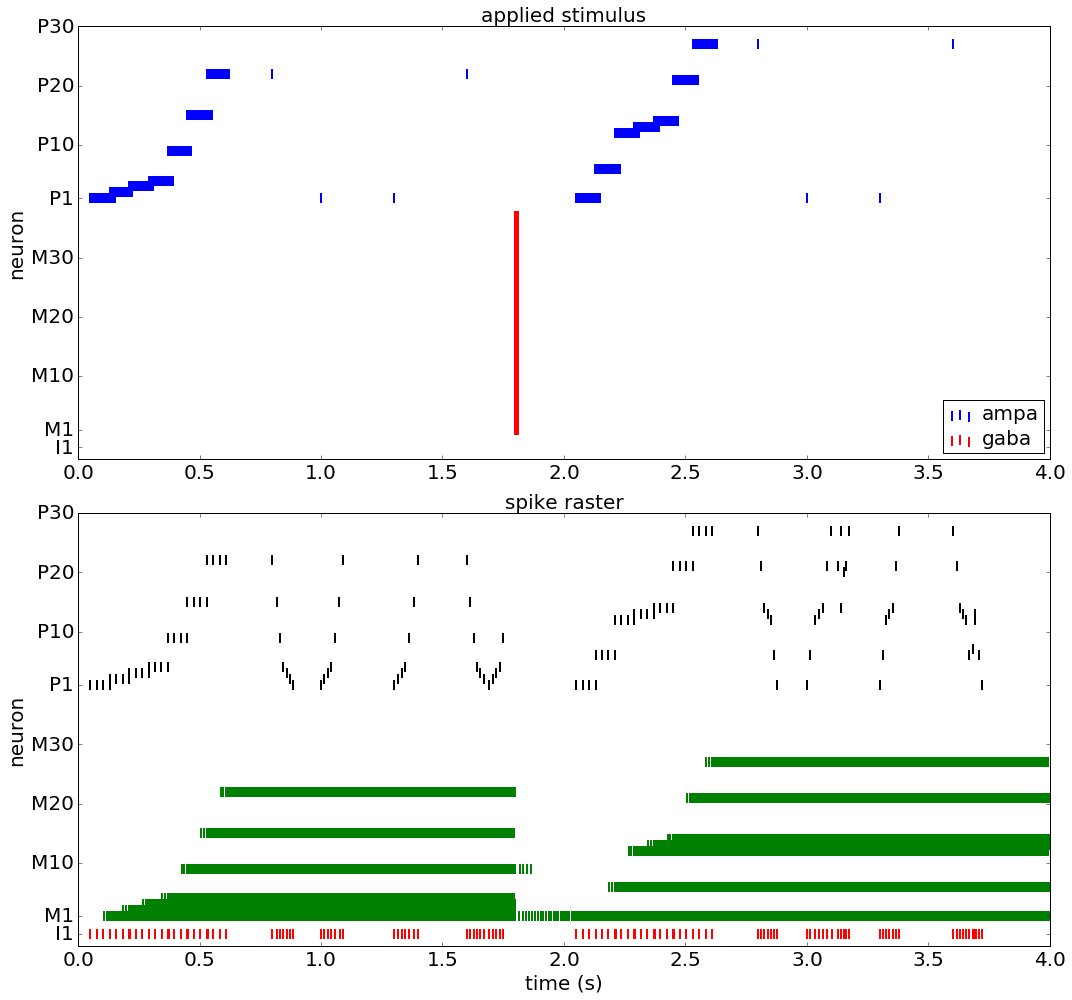

In [16]:
%matplotlib inline
import pdb
from figures.final_paper import lif_reverse_replay

fig_1 = lif_reverse_replay(
    SEED=0,
    
    V_REST=-0.07, TAU_M=0.055, V_TH=-0.02, V_RESET=-0.08,
    
    REFRAC_PER={'primary': 0.025, 'memory': .002, 'inhibitory': 0.002},
    
    TAUS_SYN={'nmda': 0.01, 'ampa': 0.001, 'gaba': 0.001},
    V_REVS_SYN={'nmda': 0.0, 'ampa': 0.0, 'gaba': -0.08},
    
    LATTICE_SIZE=4,
    
    W_PP={'nmda': 15, 'ampa': 0, 'gaba': 0},
    W_PI={'nmda': 0, 'ampa': 0, 'gaba': 600},
    W_PM={'nmda': 0, 'ampa': 22, 'gaba': 0},
    W_IP={'nmda': 0, 'ampa': 500, 'gaba': 0},
    W_II={'nmda': 0, 'ampa': 0, 'gaba': 0},
    W_MP={'nmda': 7, 'ampa': 0, 'gaba': 0},
    W_MM={'nmda': 12, 'ampa': 0, 'gaba': 0},
    
    BKGD_STARTS=[
        {'nmda': 0, 'ampa': 0, 'gaba': 0},  # CONSTANT
        {'nmda': 0, 'ampa': 0, 'gaba': 0},
        {'nmda': 0, 'ampa': 0, 'gaba': 2},
    ],
    BKGD_ENDS=[
        {'nmda': 0, 'ampa': 0, 'gaba': 4.},  # CONSTANT
        {'nmda': 0, 'ampa': 0, 'gaba': 0.75},
        {'nmda': 0, 'ampa': 0, 'gaba': 2.75},
    ],
    BKGD_FRQS=[
        {'nmda': 0, 'ampa': 0, 'gaba': 2000},  # CONSTANT
        {'nmda': 0, 'ampa': 0, 'gaba': 2000},
        {'nmda': 0, 'ampa': 0, 'gaba': 2000},
    ],
    BKGD_STRENS=[
        {'nmda': 0, 'ampa': 0, 'gaba': .5},  # CONSTANT
        {'nmda': 0, 'ampa': 0, 'gaba': 5},
        {'nmda': 0, 'ampa': 0, 'gaba': 5},
    ],
    
    DRIVE_SEQS=[
        [(0, 3), (0, 5), (0, 7), (0, 9), (1, 10), (2, 11), (3, 12)],
        [(0, 3), (1, 4), (2, 5), (2, 7), (2, 9), (3, 10), (4, 9)],
    ],
    DRIVE_STARTS=[
        {'nmda': 0, 'ampa': 0.05, 'gaba': 0},
        {'nmda': 0, 'ampa': 2.05, 'gaba': 0},
    ],
    DRIVE_STRENS=[
        {'nmda': 0, 'ampa': 500, 'gaba': 0},
        {'nmda': 0, 'ampa': 500, 'gaba': 0},
    ],
    DRIVE_DURS=[
        {'nmda': 0, 'ampa': 0.1, 'gaba': 0},
        {'nmda': 0, 'ampa': 0.1, 'gaba': 0},
    ],
    DRIVE_FRQS=[
        {'nmda': 0, 'ampa': 150, 'gaba': 0},
        {'nmda': 0, 'ampa': 150, 'gaba': 0},
    ],
    DRIVE_ITVS=[
        {'nmda': 0, 'ampa': 0.08, 'gaba': 0},
        {'nmda': 0, 'ampa': 0.08, 'gaba': 0},
    ],
    
    REPLAY_TRIGGER_CELLS=[
        [(3, 12), (0, 3), (0, 3), (3, 12)],
        [(4, 9), (0, 3), (0, 3), (4, 9)],
    ],
    
    REPLAY_TRIGGER_TIMES=[
        [{'nmda': 0, 'ampa': 0.8, 'gaba': 0}, {'nmda': 0, 'ampa': 1.0, 'gaba': 0},
         {'nmda': 0, 'ampa': 1.3, 'gaba': 0}, {'nmda': 0, 'ampa': 1.6, 'gaba': 0},],
        [{'nmda': 0, 'ampa': 2.8, 'gaba': 0}, {'nmda': 0, 'ampa': 3.0, 'gaba': 0},
         {'nmda': 0, 'ampa': 3.3, 'gaba': 0}, {'nmda': 0, 'ampa': 3.6, 'gaba': 0},],
    ],
    
    REPLAY_TRIGGER_STRENS=[
        [{'nmda': 0, 'ampa': 200, 'gaba': 0}, {'nmda': 0, 'ampa': 200, 'gaba': 0},
         {'nmda': 0, 'ampa': 200, 'gaba': 0}, {'nmda': 0, 'ampa': 200, 'gaba': 0},],
        [{'nmda': 0, 'ampa': 200, 'gaba': 0}, {'nmda': 0, 'ampa': 200, 'gaba': 0},
         {'nmda': 0, 'ampa': 200, 'gaba': 0}, {'nmda': 0, 'ampa': 200, 'gaba': 0},],
    ],
    
    MEMORY_RESET_STARTS=[{'nmda': 0, 'ampa': 0, 'gaba': 1.8}],
    MEMORY_RESET_ENDS=[{'nmda': 0, 'ampa': 0, 'gaba': 1.81}],
    MEMORY_RESET_STRENS=[{'nmda': 0, 'ampa': 0, 'gaba': 6}],
    MEMORY_RESET_FRQS=[{'nmda': 0, 'ampa': 0, 'gaba': 500}],
    
    SIM_DURATION=4., DT=0.0001,
    
    FIG_SIZE=(15, 14), 
    SYN_COLORS={'ampa': 'b', 'gaba': 'r'},
    SPIKE_HEIGHT=100, 
    Y_LIM=(-2, 67), FONT_SIZE=20,
)

In [ ]:
pdb.pm()

### Limitations of this model

In the formulation of our model, we have made the implicit assumption that similarly tuned neurons are clustered into stable neuronal ensembles. Our rationale for this assumption was to specifically study the sequence-generating component of replay in isolation from spatial effects. However, experimental evidence exists for the above-chance clustering of neurons (Song 2005), and in vivo results suggest that interconnected neurons share similar stimulus tuning (Ko 2011). Further, modeling work has shown how stable, stimulus-tuned clusters may emerge over time via spike-timing-dependent plasticity in large collections of excitatory and inhibitory neurons (Litwin-Kumar 2014).

Another limitation of our model is that we assumed binary connection weights between neuronal ensembles. While this simplified our analysis, one might more generally imagine a network with weighted connections. To address this possibility we generalized our discrete-time probabilistic model to include both weak ($W_{ij} = 1$) and strong ($W_{ij} = 2$) connections between ensembles (supplementary). Provided that $g_x$, the relative influence of hyperexcitability on determining an ensemble's input, was sufficiently strong, the results on sequence replay were largely the same (**Supplementary Figure 1**) as those shown in **Figure 5**. The main effect of including strong and weak connections vs. binary connections was to bias the network's spontaneous activity to sample paths following strong connectinos. An additional effect was that if a stimulus initially drove a "weak" sequence in the network, then if an overlapping "strong" sequence activated by chance during the replay epoch, then the "weak" sequence's probability of subsequently replaying was significantly decreased.

A final limitation of our model is that apart from via lingering hyperexcitability, the probability of an ensemble activating at a given time step did not dependent on ensembles active at any but the immediately preceding time step, whereas one more generally might expect dependencies on neuronal activations at multiple previous time steps (Mahoney 2016). This could be incorporated into our simplified model by including multiple weight matrices $W^{\Delta}$ specifying the effective influence of an active ensemble on ensembles active $\Delta$ time steps in the future. In the LIF network, the influence of previous spikes at multiple delays could be incorporated by implementing each stimulus-tuned ensemble as a short-chain of neurons, with each neuron in the chain exhibiting potentially different projection patterns. Following essentially the same reasoning as in our original analysis, we expect activation-triggered hyperexcitability to also be able to bias sequences towards replay in this case, but a more detailed investigation is beyond the scope of this work.

### Computational theory behind the model

Single-neuron activity timescales tend to be on the order of 10s to 100s of milliseconds (ref), but these can be extended to the multi-second timescales of working memory via persistent activity arising from recurrent network connections (Barak 2014). An additional requirement for the use of persistent activity as a substrate for working memory is that it maintains information about a previous stimulus or activity pattern. Fundamentally, our LIF model is able to maintain information about a large number of sequences due to the combinatorial space of persistent activity patterns, since each memory neuron may be in either an up- or downstate, regardless of the states of the other memory neurons. While we have taken advantage of the innate compositional nature of indepedendent bistable units, it is also known through both network simulations (Maass 2002, Chaudhuri 2016) and in vivo experiments (Crowe 2010) that stimulus-specific information can stably persist in networks without stable states. How such dynamic states could similarly be composed together to represent a wide variety of sequences would be a fruitful direction for further study.

Another crucial requirement of a persistent-activity-based neural system for sequence replay is the ability to reconstruct the original sequence from the persistent activity. With stimulus-triggered persistent activity in a general recurrent network information about the stimulus can be recovered theoretically, but a trained decoder is typically required (Lukosevicius 2009). Additionally, since in general the representation of the past stimulus in the persistent activity may change over time, different decoders might be required at different time points after the original stimulus (cite). In our network, however, the persistent activity state directly biases the network towards reproducing specific sequences, tagging the neurons/ensembles involved in the sequence by effectively changing their excitability. This obviates the need for a specific decoder, thus simplifying the circuit required for reactivation. Finally, while the hyperexcitability-inducing persistent activity in our model is triggered by activation of specific neurons/ensembles, our results more generally shed light on how static, spatially distributed inputs to a network may modulate its bias towards certain spatiotemporal activation patterns and therefore control the specific computations the network performs.

### Experimental predictions of the model

The foremost prediction made by our model of neuronal sequence reactivation is that the sequences that reactivate will not be completely arbitrary but rather should correspond to sequences already preferred by the networks. Consistent with this is the observation that replay of neuronal sequences in hippocampal CA1 cells during pauses of a rat's traversal of a track occurred at a constant speed, rather than as a function of the nonuniform temporal pattern of track traversal (Davidson 2009). An untested prediction is that the replayed sequences would correspond to paths through the network, which could be explored through a connectomic analysis of brain areas exhibiting sequence replay. The model also makes the prediction that if sequences overlap in the ensembles they activate, replay will not exclusively reflect the original sequential activation patterns but should also exhibit mixtures of the original sequences, which is consistent with evidence that hippocampal replay does not strictly reflect prior experience but may instead be more involved in developing a spatial map (Gupta 2010). Our model also predicts that neurons participating in reactivating sequences will do so because they are more hyperexcitable. It was indeed shown over a multi-hour time course that reactivating hippocampal neurons exhibited increased excitability (Mizunumi 2014), but our model predicts that this would occur in the short-term as well (seconds to minutes). This could be specifically tested by quantifying the response of a reactivating vs. nonreactivaing neurons to an equal current injection using in vivo patch clamping (Tao).

### Relationship to predictive coding

Our model network replays temporarily stored sequences from the first element of the sequence, which can be viewed as pattern completion. While pattern completion is frequently observed in the brain (Bakker 2008, Mizumori 1989), there is also a substantial amount of evidence for brain signals indicating the deviation of a stimulus from what is expected (Kutas 1983, Rao 1999). Our model does not explicitly detect deviations, but it provides a representation of the stimulus that is expected to occur which could then be compared to the true stimulus. Importantly, because it uses a non-Hebbian mechanism for learning expected sequences, our model can learn to predict expected stimuli over the short-term.

### Conclusions

We have shown that neural networks exhibiting activation-triggered hyperexcitability, in spite of their relative simplicity, are sufficient to replay sequential activation patterns that have occurred in the past without invoking Hebbian plasticity. When the original sequences are driven by external stimuli that make sparse transitions among a large number of elements, then the replayed sequences can contain a large amount of information about the original stimuli if the network's connectivity reflects the stimulus transitions. This sheds light on both the neural mechanisms of working memory as well as on how persistent, spatially distributed inputs to a network can modify the computations it performs.